In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from fsmodels import SklSingleExpFrequencyScan

# sklearn-compatible class

In [2]:
frequency_powers = np.linspace(0, 3.5, 1000)
frequency_powers = tf.Variable(frequency_powers, dtype='float64').numpy()

In [3]:
fs = SklSingleExpFrequencyScan(filling_pulse=20*10**-6)

fs.exps_params_ = [-2.3, 3.5]
fs.p_coef_ = 0.2

experimental_dlts = fs.predict(frequency_powers) 
experimental_dlts += np.random.normal(loc=0, scale=0.2, size=experimental_dlts.shape[0])

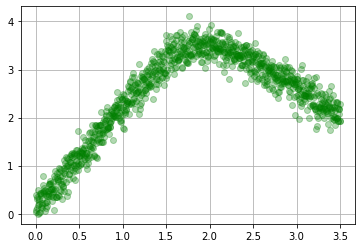

In [4]:
plt.plot(frequency_powers, experimental_dlts, 'og', alpha=0.3)
plt.grid()
plt.show()

In [5]:
fs = SklSingleExpFrequencyScan(filling_pulse=2*10**-6,
                               fit_p_coef = True,
                               learning_rate=0.05,
                               n_iters=200,
                               stop_val=10**-5,
                               verbose=False
                              )

fs.fit(X=frequency_powers, y=experimental_dlts)

SklSingleExpFrequencyScan(filling_pulse=2e-06, learning_rate=0.05, n_iters=200,
                          stop_val=1e-05)

In [6]:
fit_results = fs.fit_results_
fit_results

,n_exps,filling_pulse,loss,amplitude,time_constant_power,p_coef
0,1,0.000002,1.875529,3.5,-2.473923,1.0
1,1,0.000002,1.625273,3.526713,-2.414358,0.909552
2,1,0.000002,1.3624,3.553681,-2.365994,0.81035
3,1,0.000002,1.075653,3.580295,-2.32658,0.702028
4,1,0.000002,0.761553,3.605784,-2.294005,0.584945
...,...,...,...,...,...,...
69,1,0.000002,0.039921,3.528919,-2.288126,0.206434
70,1,0.000002,0.039909,3.528178,-2.288235,0.206319
71,1,0.000002,0.039899,3.527459,-2.288342,0.206207
72,1,0.000002,0.039889,3.526761,-2.288445,0.206099


In [7]:
fs.exps_params_

array([-2.28864232,  3.52542829])

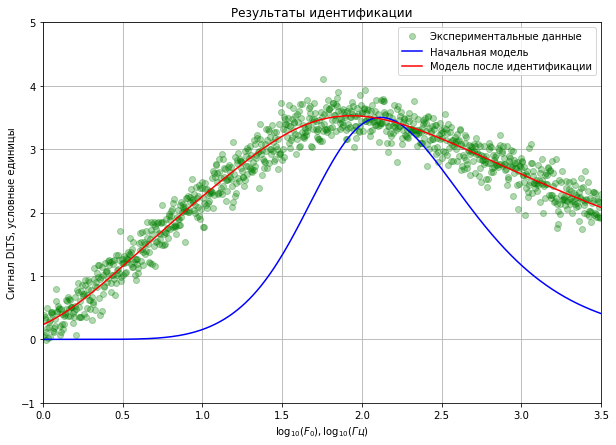

In [8]:
def plot_ident_res(frequency_powers,
                   experimental_dlts, 
                   fit_results
                  ):
    
    indices = frequency_powers.argsort()
    frequency_powers = frequency_powers[indices]
    experimental_dlts = experimental_dlts[indices]
    
    init_params = fit_results.iloc[0, :]
    init_exps_params = [init_params.time_constant_power, init_params.amplitude]
    init_p_coef = init_params.p_coef
    
    
    fs = SklSingleExpFrequencyScan(filling_pulse = fit_results.filling_pulse[0])
    
    fs.exps_params_ = init_exps_params
    fs.p_coef_ = init_p_coef
    initial_model = fs.predict(frequency_powers)
    
    
    final_params = fit_results.iloc[-1, :]
    final_exps_params = [final_params.time_constant_power, final_params.amplitude]
    final_p_coef = final_params.p_coef
    
    fs.exps_params_=final_exps_params
    fs.p_coef_ = final_p_coef
    final_model = fs.predict(frequency_powers)
    

    fig, ax = plt.subplots(1, 1, figsize=(10, 7))

    ax.plot(frequency_powers, experimental_dlts, 'og', alpha=0.3, label='Экспериментальные данные')

    ax.plot(frequency_powers, initial_model, '-b', label='Начальная модель')

    ax.plot(frequency_powers, final_model, '-r', label='Модель после идентификации')

    ax.legend()
    ax.grid()
    ax.set_xlim([0, 3.5])
    ylim = ax.get_ylim()
    ylim = [np.floor(ylim[0]), np.ceil(ylim[1])]
    ax.set_ylim(ylim)
    
    ax.set_title('Результаты идентификации')
    ax.set_xlabel(r'$\log_{10}(F_0), \log_{10}(Гц)$')
    ax.set_ylabel('Сигнал DLTS, условные единицы')
    
    return fig, ax



fig, ax = plot_ident_res(frequency_powers,
                         experimental_dlts, 
                         fit_results
                        )

plt.show()

In [9]:
fs.get_params()

{'filling_pulse': 2e-06,
 'fit_p_coef': True,
 'learning_rate': 0.05,
 'n_iters': 200,
 'stop_val': 1e-05,
 'verbose': False}

In [10]:
fs.set_params(fit_p_coef=False)

SklSingleExpFrequencyScan(filling_pulse=2e-06, fit_p_coef=False,
                          learning_rate=0.05, n_iters=200, stop_val=1e-05)

In [11]:
fs.get_params()

{'filling_pulse': 2e-06,
 'fit_p_coef': False,
 'learning_rate': 0.05,
 'n_iters': 200,
 'stop_val': 1e-05,
 'verbose': False}

In [12]:
fs.score(X=frequency_powers, y=experimental_dlts)

0.956501526794903

In [13]:
fs.predict(X=frequency_powers)

array([0.23175787, 0.23590558, 0.24009651, 0.24433057, 0.2486077 ,
       0.25292781, 0.25729081, 0.2616966 , 0.26614508, 0.27063613,
       0.27516964, 0.27974548, 0.28436353, 0.28902365, 0.29372569,
       0.2984695 , 0.30325494, 0.30808185, 0.31295005, 0.31785937,
       0.32280965, 0.32780069, 0.3328323 , 0.3379043 , 0.34301649,
       0.34816866, 0.3533606 , 0.3585921 , 0.36386294, 0.3691729 ,
       0.37452174, 0.37990925, 0.38533517, 0.39079928, 0.39630132,
       0.40184104, 0.4074182 , 0.41303252, 0.41868376, 0.42437165,
       0.43009592, 0.43585629, 0.44165249, 0.44748425, 0.45335128,
       0.45925329, 0.46519   , 0.47116112, 0.47716634, 0.48320539,
       0.48927795, 0.49538373, 0.50152242, 0.50769371, 0.5138973 ,
       0.52013288, 0.52640013, 0.53269874, 0.5390284 , 0.54538878,
       0.55177956, 0.55820044, 0.56465107, 0.57113115, 0.57764034,
       0.58417831, 0.59074475, 0.59733932, 0.6039617 , 0.61061155,
       0.61728854, 0.62399234, 0.63072263, 0.63747907, 0.64426

# K-fold Cross-Validation and hyperparameter tuning

## Подготовка данных

In [14]:
X_train, X_test, y_train, y_test = train_test_split(frequency_powers, experimental_dlts, test_size=0.2)

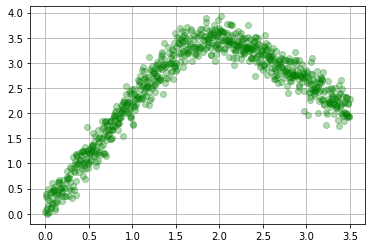

In [15]:
plt.plot(X_train, y_train, 'og', alpha=0.3)
plt.grid()
plt.show()

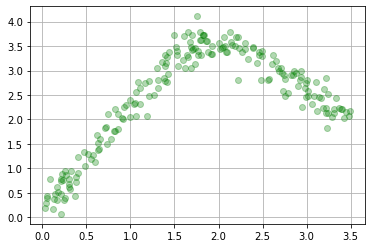

In [16]:
plt.plot(X_test, y_test, 'og', alpha=0.3)
plt.grid()
plt.show()

## fit_p_coef=False

In [17]:
fs = SklSingleExpFrequencyScan(filling_pulse=2*10**-5,
                               fit_p_coef=False,
                               learning_rate=0.05,
                               n_iters=200,
                               stop_val=10**-5,
                               verbose=False
                              )

fs.fit(X=X_train, y=y_train)

SklSingleExpFrequencyScan(filling_pulse=2e-05, fit_p_coef=False,
                          learning_rate=0.05, n_iters=200, stop_val=1e-05)

In [18]:
def display_scores(scores):
    print(f'Scores: {scores}')
    print(f'Mean: {scores.mean()}')
    print(f'Standard deviation: {scores.std()}')

scores = cross_val_score(fs, X_train, y_train, scoring='neg_mean_squared_error', cv=10, n_jobs=-1)

display_scores(np.sqrt(-scores))

Scores: [1.29206827 1.12291428 1.10268688 1.27636669 1.20665512 1.2435962
 1.22611032 1.15524838 1.23057009 1.26396445]
Mean: 1.2120180675245429
Standard deviation: 0.06158855899784166


In [19]:
fs.fit_results_

,n_exps,filling_pulse,loss,amplitude,time_constant_power,p_coef
0,1,0.00002,1.812209,3.5,-2.148141,1.0
1,1,0.00002,1.784753,3.528232,-2.174106,1.0
2,1,0.00002,1.763388,3.555896,-2.193085,1.0
3,1,0.00002,1.745632,3.582929,-2.206935,1.0
4,1,0.00002,1.73013,3.60931,-2.217018,1.0
...,...,...,...,...,...,...
143,1,0.00002,1.463885,4.608224,-2.235291,1.0
144,1,0.00002,1.463874,4.60899,-2.235284,1.0
145,1,0.00002,1.463862,4.609738,-2.235278,1.0
146,1,0.00002,1.463852,4.610467,-2.235271,1.0


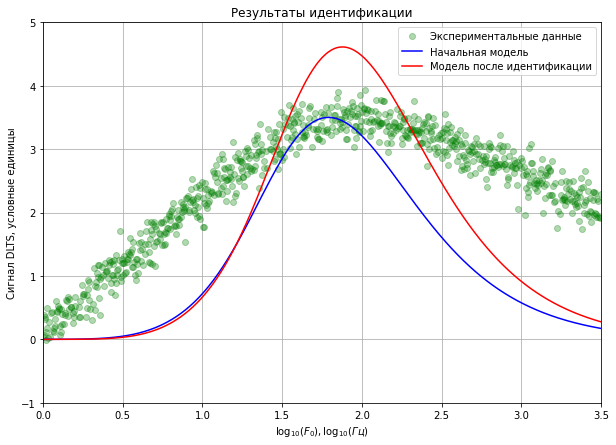

In [20]:
fit_results = fs.fit_results_

fig, ax = plot_ident_res(X_train,
                         y_train, 
                         fit_results
                        )

plt.show()

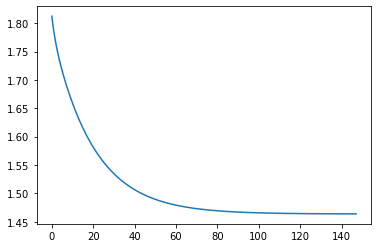

In [21]:
plt.plot(fit_results.loss)
plt.show()

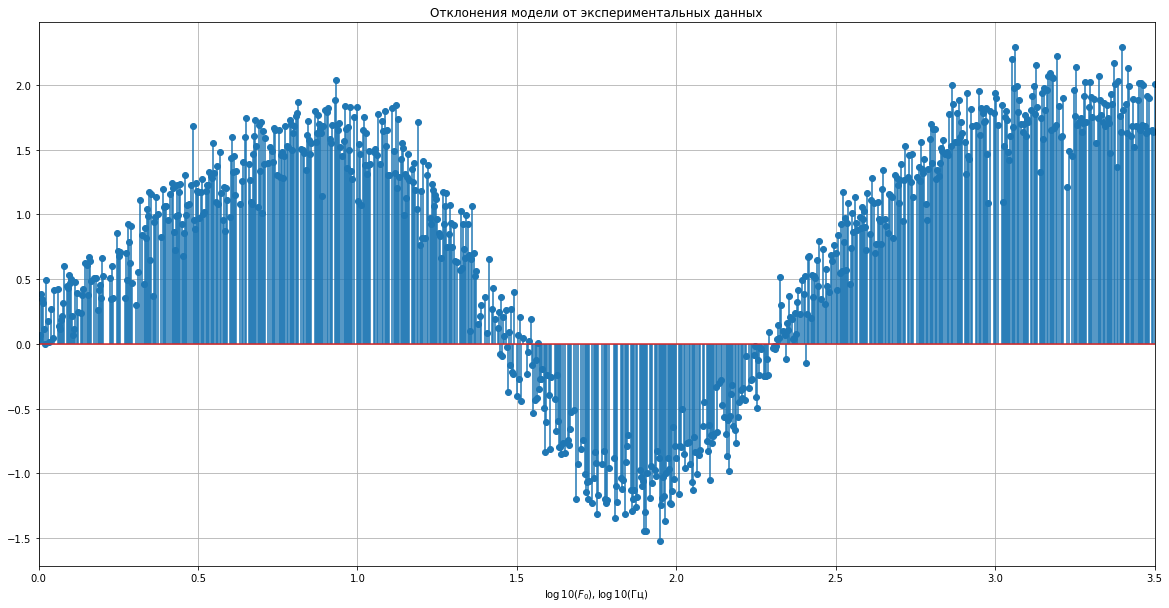

In [22]:
plt.figure(figsize=(20,10))
plt.stem(X_train, (y_train - fs.predict(X_train)))
plt.grid()
plt.title('Oтклонения модели от экспериментальных данных')
plt.xlabel(r'$\log10(F_0), \log10($Гц$)$')
plt.xlim(0, 3.5)
plt.show()

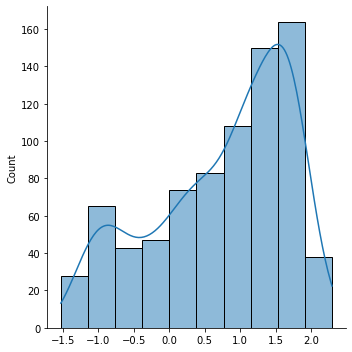

In [23]:
sns.displot(x=y_train - fs.predict(X_train), bins=10, kde=True)
plt.show()

## fit_p_coef=True

In [24]:
fs = SklSingleExpFrequencyScan(filling_pulse=2*10**-5,
                               fit_p_coef=True,
                               learning_rate=0.05,
                               n_iters=200,
                               stop_val=10**-5,
                               verbose=False
                              )

fs.fit(X=X_train, y=y_train)

SklSingleExpFrequencyScan(filling_pulse=2e-05, learning_rate=0.05, n_iters=200,
                          stop_val=1e-05)

In [25]:
def display_scores(scores):
    print(f'Scores: {scores}')
    print(f'Mean: {scores.mean()}')
    print(f'Standard deviation: {scores.std()}')

scores = cross_val_score(fs, X_train, y_train, scoring='neg_mean_squared_error', cv=10, n_jobs=-1)

display_scores(np.sqrt(-scores))

Scores: [0.20098915 0.19453887 0.18496725 0.20613166 0.20781477 0.14633237
 0.1667885  0.20048256 0.20273313 0.23855068]
Mean: 0.19493289358185412
Standard deviation: 0.023613077319779876


In [26]:
fs.fit_results_

,n_exps,filling_pulse,loss,amplitude,time_constant_power,p_coef
0,1,0.00002,2.145157,3.5,-1.882836,1.0
1,1,0.00002,1.743755,3.523184,-1.981095,0.897082
2,1,0.00002,1.377661,3.548761,-2.052987,0.784347
3,1,0.00002,1.015233,3.574954,-2.102661,0.662259
4,1,0.00002,0.646985,3.600128,-2.134605,0.532591
...,...,...,...,...,...,...
70,1,0.00002,0.038371,3.514099,-2.300696,0.200332
71,1,0.00002,0.03836,3.513352,-2.300816,0.200217
72,1,0.00002,0.038349,3.512627,-2.300932,0.200105
73,1,0.00002,0.038338,3.511924,-2.301044,0.199996


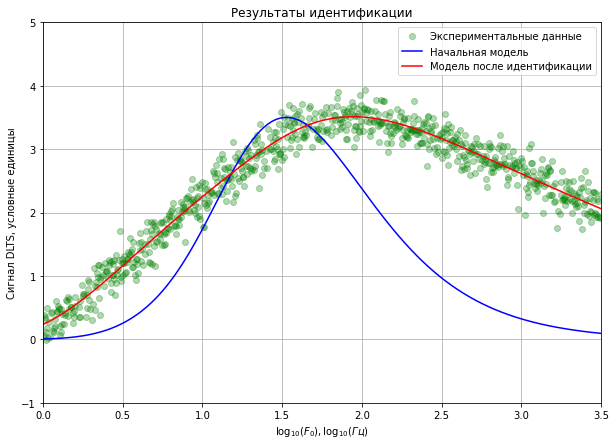

In [27]:
fit_results = fs.fit_results_

fig, ax = plot_ident_res(X_train,
                         y_train, 
                         fit_results
                        )

plt.show()

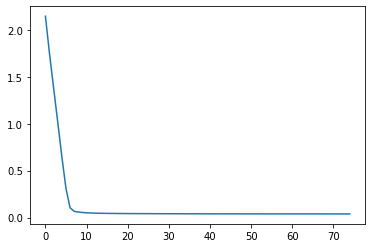

In [28]:
plt.plot(fs.fit_results_.loss)
plt.show()

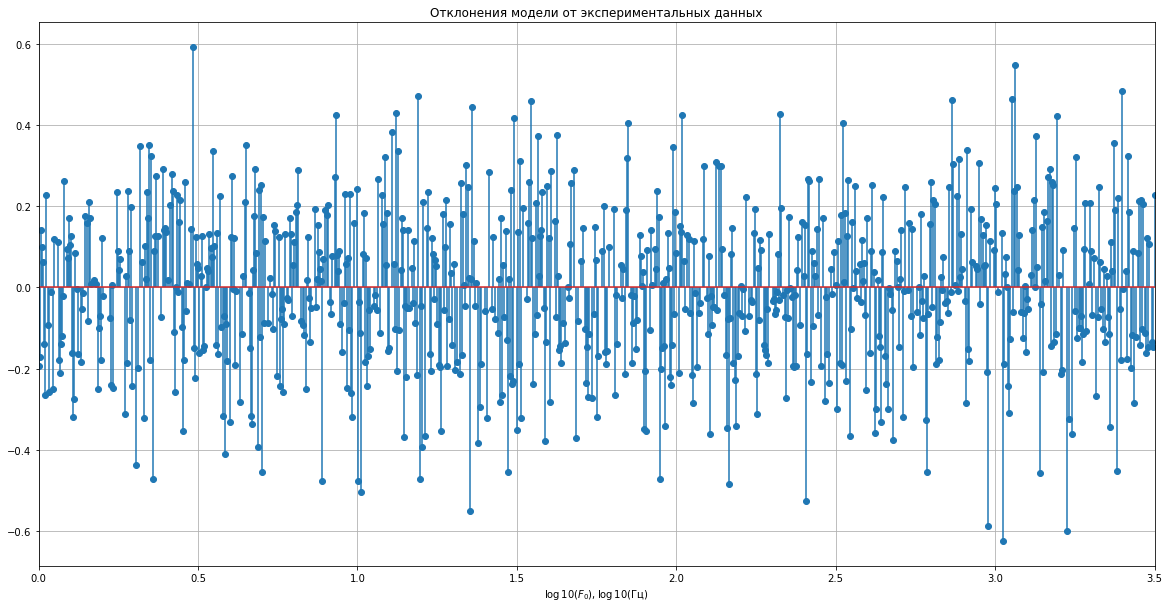

In [29]:
plt.figure(figsize=(20,10))
plt.stem(X_train, (y_train - fs.predict(X_train)))
plt.grid()
plt.title('Oтклонения модели от экспериментальных данных')
plt.xlabel(r'$\log10(F_0), \log10($Гц$)$')
plt.xlim(0, 3.5)
plt.show()

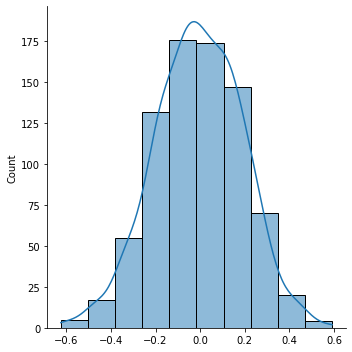

In [30]:
sns.displot(x=y_train - fs.predict(X_train), bins=10, kde=True)
plt.show()

## GridSearchCV

In [31]:
grid_search = GridSearchCV(fs, {'fit_p_coef': [False, True]}, cv=10, scoring='neg_mean_squared_error',
                           return_train_score=True, n_jobs=-1)

In [32]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=SklSingleExpFrequencyScan(filling_pulse=2e-05,
                                                 learning_rate=0.05,
                                                 n_iters=200, stop_val=1e-05),
             n_jobs=-1, param_grid={'fit_p_coef': [False, True]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [33]:
grid_search.best_params_

{'fit_p_coef': True}

In [34]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

1.2135868619562882 {'fit_p_coef': False}
0.1963546524518821 {'fit_p_coef': True}


In [35]:
scores = cross_val_score(grid_search.best_estimator_, X_train, y_train, scoring='neg_mean_squared_error', cv=10, n_jobs=-1)

display_scores(np.sqrt(-scores))

Scores: [0.20097186 0.19453994 0.18496751 0.20613179 0.2078214  0.14614358
 0.16678781 0.20046574 0.20274948 0.23854754]
Mean: 0.19491266491349515
Standard deviation: 0.02365153055715045


In [36]:
grid_search.best_estimator_.fit_results_

,n_exps,filling_pulse,loss,amplitude,time_constant_power,p_coef
0,1,0.00002,3.544416,3.5,-1.416136,1.0
1,1,0.00002,2.673717,3.501523,-1.60822,0.908277
2,1,0.00002,1.938978,3.513611,-1.770981,0.799223
3,1,0.00002,1.326435,3.532906,-1.898832,0.675413
4,1,0.00002,0.80689,3.555529,-1.991432,0.541195
...,...,...,...,...,...,...
61,1,0.00002,0.038374,3.514704,-2.300652,0.200368
62,1,0.00002,0.038363,3.513952,-2.300774,0.200251
63,1,0.00002,0.038352,3.513221,-2.300892,0.200138
64,1,0.00002,0.038341,3.512513,-2.301006,0.200028


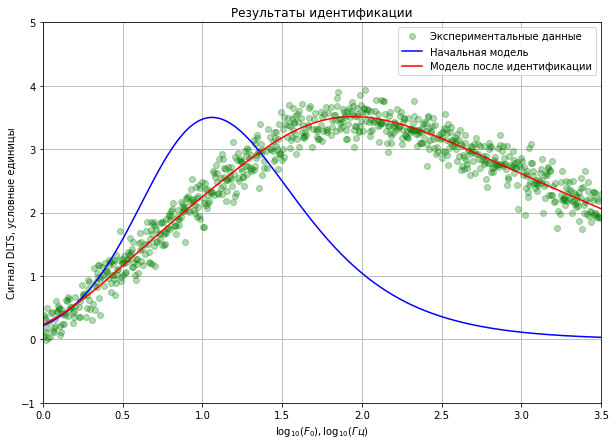

In [37]:
fit_results = grid_search.best_estimator_.fit_results_

fig, ax = plot_ident_res(X_train,
                         y_train, 
                         fit_results
                        )

plt.show()

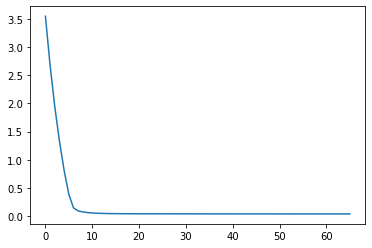

In [38]:
plt.plot(grid_search.best_estimator_.fit_results_.loss)
plt.show()

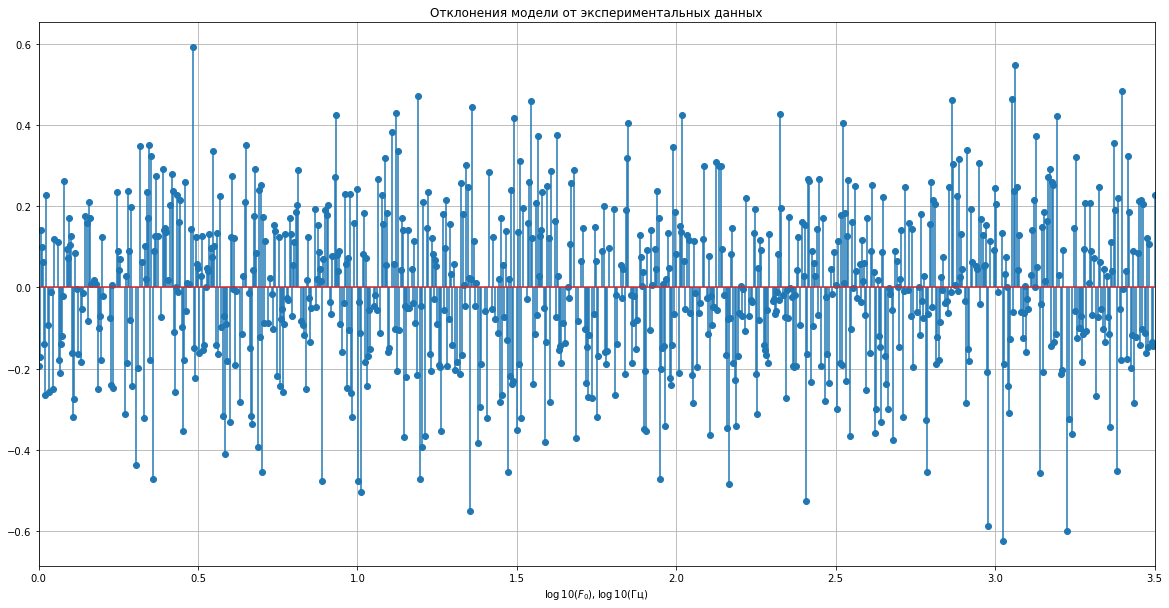

In [39]:
plt.figure(figsize=(20,10))
plt.stem(X_train, (y_train - grid_search.best_estimator_.predict(X_train)))
plt.grid()
plt.title('Oтклонения модели от экспериментальных данных')
plt.xlabel(r'$\log10(F_0), \log10($Гц$)$')
plt.xlim(0, 3.5)
plt.show()

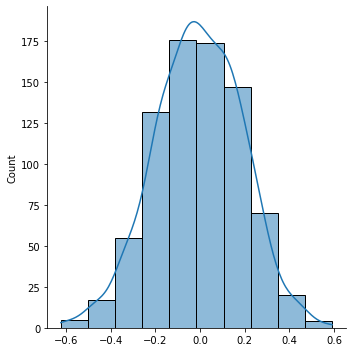

In [40]:
sns.displot(x=y_train - grid_search.best_estimator_.predict(X_train), bins=10, kde=True)
plt.show()

In [41]:
mean_squared_error(y_test, grid_search.best_estimator_.predict(X_test), squared=False)

0.2127480177793789